In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
class ANN:
    def __init__(self,epochs,lr,b1,b2):
        self.epochs=epochs
        self.lr=lr
        self.weight_collector={}
        self.loss_history=[]
        self.smoothing=1e-15
        self.alpha=1e-5
        self.w1=[]
        self.w2=[]
        self.w3=[]
        self.best_weights=[None,None,None]
        self.b1=b1 # some constant value
        self.b2=b2
        self.loss_thresold=float("inf")

    def fit(self,X_train,y_train):
        itr_numb=X_train.shape[0]
        #initializing weights using he normal 
        self.w1=np.random.randn(3)*np.sqrt(2/1)
        print(self.w1)
        #Node 2 initialization
        self.w2=np.random.randn(3)*np.sqrt(2/3)
        print(self.w2)

        #Node 3 initialization 
        self.w3=np.random.randn(2)*np.sqrt(2/2)
        print(self.w3)


        
        # Weight adjustments
        for k in range(0,self.epochs):
            loss_sum=0
            for i in range(0,itr_numb):
                #Node 1
                # multiplying weights with input 
                x_vec = X_train[i]
                node1_out = np.dot(x_vec,self.w1)+self.b1
                if node1_out<0:
                  node1_out = self.alpha*(node1_out)
                else:
                  node1_out = max(0,node1_out) # relu

                #Node 2
                x_vec = X_train[i]
                node2_out = np.dot(x_vec,self.w2)+self.b1
                if node2_out<0:
                  node2_out = self.alpha*(node2_out)
                else:
                  node2_out = max(0,node2_out) # relu

                #Node 3

                #Output layer

                out_layer = [node1_out,node2_out]

                # multiplying weights with input 
                x_vec = X_train[i]
                out_node = np.dot(out_layer,self.w3)+self.b2
                y_out=(1/(1+np.exp(-out_node)))

                #Loss/Cost function and weight updation

                # for node 1
                slope1 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]*X_train[i][0]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*
                           (self.w3[0]*X_train[i][0]))
                self.w1[0] = self.w1[0]-(self.lr*slope1)

                slope2 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]*X_train[i][1]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]*X_train[i][1]))
                self.w1[1] = self.w1[1]-(self.lr*slope2)

                slope3 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]*X_train[i][2]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]*X_train[i][2]))
                self.w1[1] = self.w1[1]-(self.lr*slope3)

                # for node 2
                slope4 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[1]*X_train[i][0]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[1]*X_train[i][0]))
                self.w2[0] = self.w2[0]-(self.lr*slope4)

                slope5 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[1]*X_train[i][1]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[1]*X_train[i][1]))
                self.w2[1] = self.w2[1]-(self.lr*slope5)

                slope6 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[1]*X_train[i][2]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[1]*X_train[i][2]))
                self.w2[1] = self.w2[1]-(self.lr*slope6)

                #for output node 

                slope7 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(node1_out)-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(node1_out)))
                self.w3[0] = self.w3[0]-(self.lr*slope7)

                slope8 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(node2_out)-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(node2_out))) 
                self.w3[1] = self.w3[1]-(self.lr*slope8)

                #Updating the biases
                slope_bias1 = -(((y_train.iloc[i]/(y_out+self.smoothing))*
                                 (1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]+self.w3[1])-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*
                                 (1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]+self.w3[1]))) 
                self.b1 = self.b1-(self.lr*slope_bias1)
                
                slope_bias2 = -(((y_train.iloc[i]/(y_out+self.smoothing))*
                                 (1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]*(node1_out)
                                 +self.w3[1]*(node2_out))-((1-y_train.iloc[i])/(1-y_out+self.smoothing))*
                                 (1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]*(node1_out)
                                 +self.w3[1]*(node2_out)))) 
                self.b2 = self.b2-(self.lr*slope_bias2)

                ##Kepping the best weights
                loss_sum+=(y_train.iloc[i]*np.log(y_out+self.smoothing))+(
                    (1-y_train.iloc[i])*np.log(1-y_out+self.smoothing))
            
            final_loss = (-loss_sum/itr_numb)
            self.loss_history.append(final_loss)
            #check
            print("************************* epoch ",k," **************************")
            print("##########################################################")
            print("w1",self.w1)
            print("w2",self.w2)
            print("w3",self.w3)
            print("b1",self.b1)
            print("b2",self.b2)
            print(node1_out)
            print(node2_out)
            print(y_out)
            print("current loss is :- ",final_loss)
            if (self.loss_history[k]<self.loss_thresold):
              self.loss_thresold=self.loss_history[k]
              self.best_weights[0]=self.w1
              self.best_weights[1]=self.w2
              self.best_weights[2]=self.w3

    def predict(self,X_test):
      #test data
      itr_numb=X_test.shape[0]
      predictions=[]
      for i in range(0,itr_numb):
        #Node 1
        # multiplying weights with input 
        x_vec = X_test[i]
        node1_out = np.dot(x_vec,self.w1)+self.b1

        #Node 2
        x_vec = X_test[i]
        node2_out = np.dot(x_vec,self.w2)+self.b1

        #Node 3

        #Output layer

        out_layer = [node1_out,node2_out]

        # multiplying weights with input 
        x_vec = X_test[i]
        out_node = np.dot(out_layer,self.w3)+self.b2
        y_out=(1/(1+np.exp(-out_node)))
        predictions.append(y_out)
      return predictions

    def train_loss_plot(self):
        plt.plot(self.loss_history)
        plt.xlabel("Epoch number")
        plt.ylabel("loss")
        plt.show()
    def test_report(self,y_test,predictions):
      conf_matrix = confusion_matrix(y_test,predictions)
      sns.heatmap(data=conf_matrix,annot=True,fmt='d')
      plt.xlabel("Predicted")
      plt.ylabel("Actual")
      print(classification_report(y_test,predictions))

# Data Preparation

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cardiovascular disease/cardio_train.csv",sep=";")

In [5]:
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [6]:
df.shape

(70000, 13)

In [7]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [8]:
X=df[["age","weight","cholesterol"]]#trdhits, chi much or chi sq vertex
y=df['cardio']

In [9]:
df.shape

(70000, 13)

In [10]:
X=X[0:30000]
y=y[0:30000]
scaling = MinMaxScaler()
X_scaled=scaling.fit_transform(X)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.40,random_state=32)

In [12]:
X_train.shape

(18000, 3)

In [13]:
y_train.value_counts()

0    9056
1    8944
Name: cardio, dtype: int64

In [14]:
y_test.value_counts()

0    6026
1    5974
Name: cardio, dtype: int64

# Testing

In [15]:
ann_object = ANN(100,0.0001,10,15)

In [16]:
ann_object.fit(X_train,y_train)

[-2.60774563  1.09081394  1.29269733]
[-0.97262667  0.2102116  -0.494553  ]
[1.47566453 0.34317435]
************************* epoch  0  **************************
##########################################################
w1 [-2.68605886  1.03639759  1.29269733]
w2 [-0.92100835  0.19247428 -0.494553  ]
w3 [-0.15428246 -1.45402678]
b1 9.98103961013203
b2 14.925502031937397
7.736368132417768
9.177379958583456
0.5976062812495821
current loss is :-  2.1142725721561755
************************* epoch  1  **************************
##########################################################
w1 [-2.6877451   1.02951875  1.29269733]
w2 [-0.93704913  0.12356639 -0.494553  ]
w3 [-0.13158899 -1.48493728]
b1 9.98232535027275
b2 14.971075099352394
7.7346812706540575
9.14965075303573
0.5924874760091537
current loss is :-  0.6554093074020041
************************* epoch  2  **************************
##########################################################
w1 [-2.68919521  1.02397686  1.29269733]

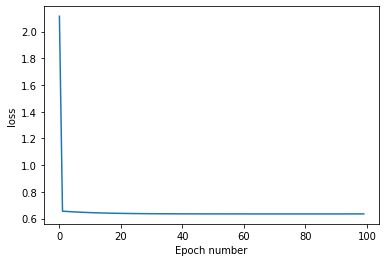

In [17]:
ann_object.train_loss_plot()

In [18]:
predictions=[]
predictions_sigmoid = ann_object.predict(X_test)
for i in predictions_sigmoid:
  if i>0.5:
    predictions.append(1)
  else:
    predictions.append(0)

              precision    recall  f1-score   support

           0       0.63      0.66      0.65      6026
           1       0.64      0.61      0.63      5974

    accuracy                           0.64     12000
   macro avg       0.64      0.64      0.64     12000
weighted avg       0.64      0.64      0.64     12000



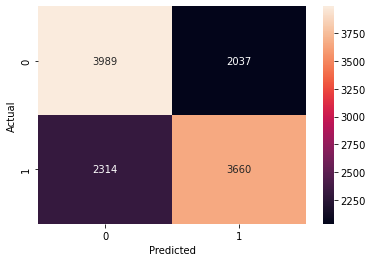

In [19]:
ann_object.test_report(y_test,predictions)

In [20]:
pd.Series(predictions).value_counts()

0    6303
1    5697
dtype: int64

In [21]:
data={
    "w1":ann_object.w1,
    "w2":ann_object.w2,
    "w3":ann_object.w3,
    "b1":ann_object.b1,
    "b2":ann_object.b2
}

In [22]:
data

{'b1': 9.986444458595702,
 'b2': 16.38592739101325,
 'w1': array([-2.68950102,  1.03862028,  1.29269733]),
 'w2': array([-1.38105792, -1.16184619, -0.494553  ]),
 'w3': array([ 0.20240883, -2.10047539])}

<h1> Bias collector </h1>

In [23]:
# #AUC
# from sklearn.metrics import roc_curve
# fpr, tpr, thresholds=roc_curve(y_test,predictions)

In [24]:
# loss3=ann_object.loss_history

In [25]:
# loss1=ann_object.loss_history

In [26]:
# loss2=ann_object.loss_history

In [27]:
# bias_values={}

In [28]:
# bias_values[("b1=1,b2=1")]=loss1

In [29]:
# bias_values[("b1=10,b2=15")]=loss2

In [30]:
# bias_values[("b1=3,b2=4.5")]=loss3

In [31]:
# df_graph= pd.DataFrame(bias_values)

In [32]:
# df_graph['b1=1,b2=1']

In [33]:
# plt.plot(df_graph['b1=1,b2=1'],'p')
# plt.plot(df_graph['b1=3,b2=4.5'],"*")
# plt.plot(df_graph['b1=10,b2=15'],"^",markersize=4)
# plt.legend(['b1=1,b2=1',"b1=3,b2=4.5",'b1=10,b2=15'])
# plt.xlabel("Epoch number")
# plt.ylabel("Loss value")
# plt.show()

<h1> Using keras </h1>

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
model=keras.Sequential()
model.add(keras.layers.Dense(2,input_dim=3,activation="leaky_relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [38]:
model_history=model.fit(X_train,y_train,epochs=100)

Epoch 1/100
563/563 [==============================] - 2s 2ms/step - loss: 0.6904 - accuracy: 0.5239
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 0.6767 - accuracy: 0.5598
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 0.6697 - accuracy: 0.5938
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 0.6654 - accuracy: 0.5941
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 0.6619 - accuracy: 0.5942
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 0.6588 - accuracy: 0.5945
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.6562 - accuracy: 0.5962
Epoch 8/100
563/563 [==============================] - 1s 2ms/step - loss: 0.6536 - accuracy: 0.6006
Epoch 9/100
563/563 [==============================] - 1s 2ms/step - loss: 0.6512 - accuracy: 0.6063
Epoch 10/100
563/563 [==============================] - 1s 2ms/step - loss: 0.6489 - accura

In [39]:
predictionsKeras=[]
predictions_sigmoid_keras = model.predict(X_test)
for i in predictions_sigmoid_keras:
  if i>0.5:
    predictionsKeras.append(1)
  else:
    predictionsKeras.append(0)

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      6026
           1       0.64      0.63      0.64      5974

    accuracy                           0.64     12000
   macro avg       0.64      0.64      0.64     12000
weighted avg       0.64      0.64      0.64     12000



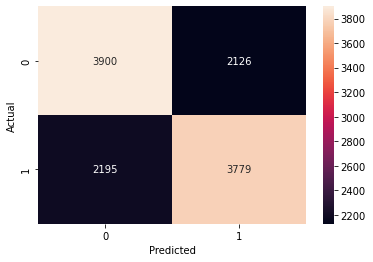

In [40]:
conf_matrix = confusion_matrix(y_test,predictionsKeras)
sns.heatmap(data=conf_matrix,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,predictionsKeras))

<h1> Loss visualization </h1>

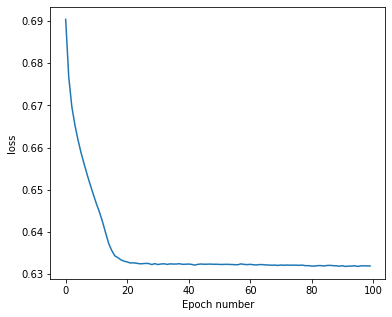

In [41]:
plt.figure(figsize=(6,5))
plt.plot(model_history.history['loss'])
plt.xlabel("Epoch number")
plt.ylabel("loss")
plt.show()

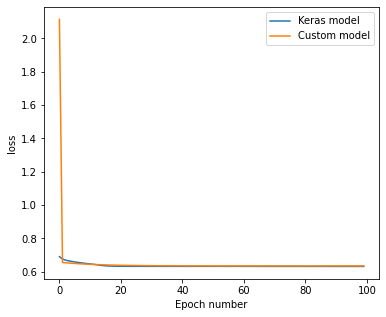

In [42]:
plt.figure(figsize=(6,5))
plt.plot(model_history.history['loss'])
plt.plot(ann_object.loss_history)
plt.xlabel("Epoch number")
plt.ylabel("loss")
plt.legend(['Keras model','Custom model'])
plt.show()

In [43]:
model.save_weights("kerasModelBio.h5")

<h1> Precision Recall Curve </h1>

In [44]:
#predictions_sigmoid
def PR_cal(custom_thresolds,y_test,predictions_sigmoid):
  precisionData = []
  recallData = []
  for i in custom_thresolds:
    predictions=[]
    for values in predictions_sigmoid:
      if values>i:
        predictions.append(1)
      else:
        predictions.append(0)
    tn, fp, fn, tp=confusion_matrix(y_test,predictions).ravel()
    precision=tp/(tp+fp)
    recall = tp/(tp+fn)
    # print(f"{i}  {precision}")
    # print(f"{i}  {recall}")
    precisionData.append(precision)
    recallData.append(recall)
  return precisionData,recallData

In [45]:
#custom_thresolds=[0.2,0.3,0.5,0.6,0.7,0.8,0.9]
custom_thresolds=np.linspace(0,0.98,100)

In [46]:
precisionData,recallData=PR_cal(custom_thresolds,y_test,predictions_sigmoid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


In [47]:
precisionDataKeras,recallDataKeras=PR_cal(custom_thresolds,y_test,predictions_sigmoid_keras)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


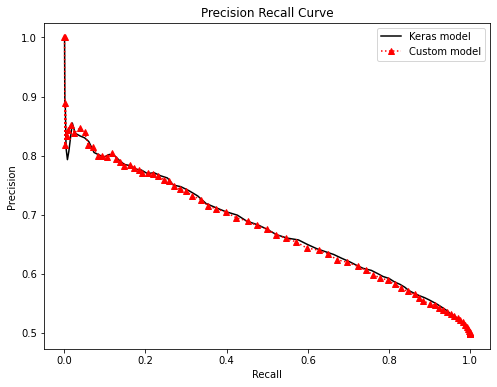

In [48]:
plt.figure(figsize=(8,6))
plt.plot(recallDataKeras,precisionDataKeras,"-k")
plt.plot(recallData,precisionData,"^r:")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(['Keras model',"Custom model"])
plt.title("Precision Recall Curve")

plt.show()

<h1> ROC </h1>

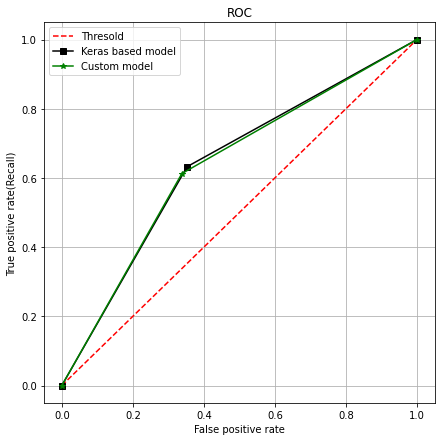

In [49]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds2=roc_curve(y_test,predictions)
fpr2, tpr2, thresholds1=roc_curve(y_test,predictionsKeras)
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], '--',color='red',label='Thresold')
plt.plot(fpr2, tpr2,color='black',label='Keras based model',marker="s")
plt.plot(fpr1, tpr1,color='green',label='Custom model',marker="*")
plt.ylabel('True positive rate(Recall)')
plt.xlabel('False positive rate')
plt.title('ROC')
plt.grid()
plt.legend()
plt.show()

<h1> ROC AUC </h1>

In [50]:
rocAucCustom = roc_auc_score(y_test,predictions)
rocAucCustom

0.6373098283734439

In [51]:
rocAucKeras = roc_auc_score(y_test,predictionsKeras)
rocAucKeras

0.6398849878403272

<h1> Bias Tuner </h1>

In [52]:
# class ANNTuner():
#   def __init__(self,model,lower_thresold,upper_thresold):
#     self.model=model
#     self.lower_thresold=lower_thresold
#     self.upper_thresold = upper_thresold
#     self.epochs=100
#     self.learning_rate=0.0001
#     self.finalResult={}
#     self.temp=[]
#   def tune(self,X_train,y_train,X_test,y_true):
#     for i in range(0,len(self.lower_thresold)):
#       modelObj = self.model(self.epochs,self.learning_rate,self.lower_thresold[i],self.upper_thresold[i]) 
#       modelObj.fit(X_train,y_train)
#       predictions=[]
#       predictions_sigmoid = modelObj.predict(X_test)
#       for j in predictions_sigmoid:
#         if j>0.5:
#           predictions.append(1)
#         else:
#           predictions.append(0)
#       print(f"{i}   {predictions_sigmoid}")
#       print(f"{i}   {predictions}")
#       self.temp.append(f1_score(y_true,predictions))
#       self.finalResult[(self.lower_thresold[i],self.upper_thresold[i])]=self.temp[i]
#     return self.finalResult

In [53]:
# ANNTuner_obj = ANNTuner(ANN,[1.5,2,10,12],[3.9,4.5,15,17])
# baises_withF1Score = ANNTuner_obj.tune(X_train,y,X_test,y_test)

In [54]:
# print(baises_withF1Score)